### Jialong Feng Assignment1 
### 01102024

In [5]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
import requests
import io
warnings.filterwarnings('ignore')

# 1.) Import Data from FRED

In [9]:
data_link = "https://raw.githubusercontent.com/BACCHUS2333/RepositoryDelete.github.io/main/data/TaylorRuleData.csv"
s=requests.get(data_link).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0)
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.48
1947-02-01,NaN,NaN,NaN,21.62
1947-03-01,NaN,NaN,NaN,22.00
1947-04-01,NaN,NaN,NaN,22.00
1947-05-01,NaN,NaN,NaN,21.95


In [10]:
data.index = pd.to_datetime(data.index)
#change the index to datetime

In [11]:
data.info()
data = data.dropna()
data.info()
#get data information and drop the missing value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 924 entries, 1947-01-01 to 2023-12-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FedFunds       834 non-null    float64
 1   Unemployment   912 non-null    float64
 2   HousingStarts  779 non-null    float64
 3   Inflation      923 non-null    float64
dtypes: float64(4)
memory usage: 36.1 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 779 entries, 1959-01-01 to 2023-11-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FedFunds       779 non-null    float64
 1   Unemployment   779 non-null    float64
 2   HousingStarts  779 non-null    float64
 3   Inflation      779 non-null    float64
dtypes: float64(4)
memory usage: 30.4 KB


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [12]:
s1,s2 = 0.7,0.9
split_1 = int(len(data) * s1)
split_2 = int(len(data) * s2)
data_in = data.iloc[:split_1]
data_out = data.iloc[split_1:split_2]
data_hold = data_hold = data.iloc[split_2:]
#split the data into three parts on a ratio of 7:2:1

In [13]:
feature_columns = ['Unemployment', 'HousingStarts', 'Inflation']
target_column = 'FedFunds'
#set the feature columns and target column
X_in = data_in[feature_columns]
y_in = data_in[target_column]

X_out = data_out[feature_columns]
y_out = data_out[target_column]

X_hold = data_hold[feature_columns]
y_hold = data_hold[target_column]
#split the data into X and y

In [14]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [15]:
model1 = sm.OLS(y_in, X_in).fit()
dir(model1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influe

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FedFunds   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     20.45
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.45e-12
Time:                        23:09:15   Log-Likelihood:                -1399.2
No. Observations:                 545   AIC:                             2806.
Df Residuals:                     541   BIC:                             2824.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.3174      0.945      5.629      0.000       3.462       7.173
Unemployment      0.6084      0.094      6.465      0.000       0.424       0.793
HousingStarts    -0.0015      0.000     -3.372      0.001      -0.002      -0.001
Inflation        -0.0054      0.003     -2.100      0.036      -0.010      -0.000
==============================================================================
Omnibus:                       60.463   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.385
Skew:                           0.805   Prob(JB):                     7.82e-19
Kurtosis:                       4.039   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4.) Recreate the graph fro your model

In [17]:
import matplotlib.pyplot as plt

In [18]:
in_pred = model1.predict(X_in)
out_pred = model1.predict(X_out)

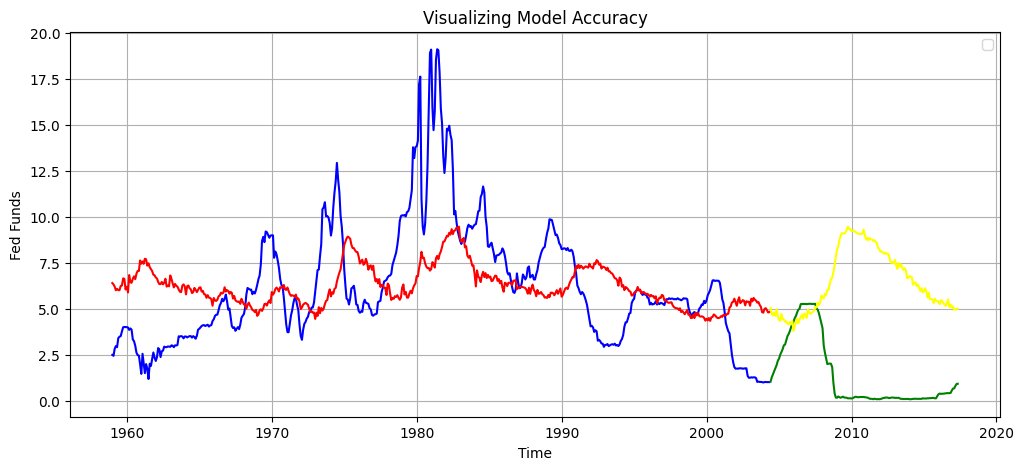

In [22]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in,color='blue')
plt.plot(y_out,color='green')  
plt.plot(in_pred,color='red') 
plt.plot(out_pred,color = 'yellow')
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
in_pred = model1.predict(X_in)
out_pred = model1.predict(X_out)
in_mse_1 = mean_squared_error(y_in, in_pred)
out_mse_1 = mean_squared_error(y_out, out_pred)

In [27]:


print(pd.DataFrame({'Insample MSE':in_mse_1,'Outsample MSE':out_mse_1},index=['Linear Regression']))

                   Insample MSE  Outsample MSE
Linear Regression      9.941372      36.374408


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
degrees = 3

In [30]:
# Create polynomial features
poly = PolynomialFeatures(degree = degrees)
X_in_poly = poly.fit_transform(X_in)
X_out_poly = poly.transform (X_out)

DEGREE: 1


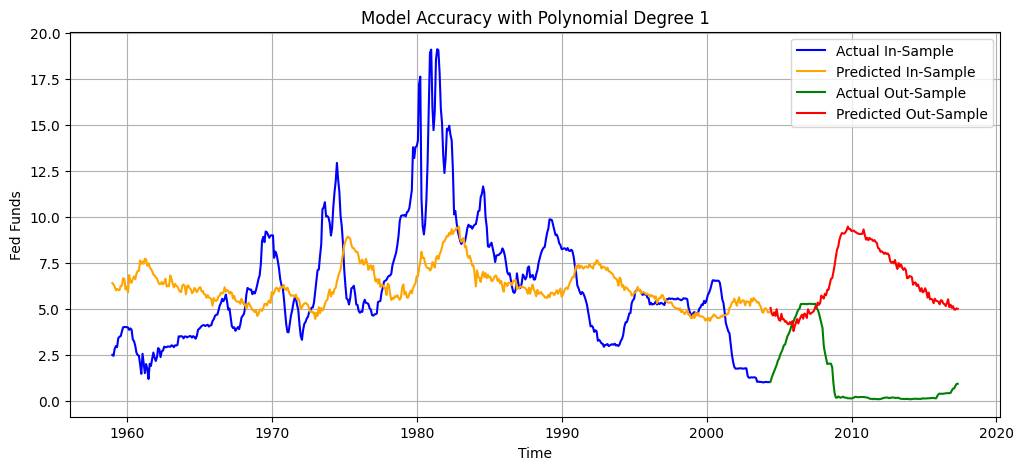

In-sample MSE: 9.941371557463341
Out-of-sample MSE: 36.37440833444245
------------
DEGREE: 2


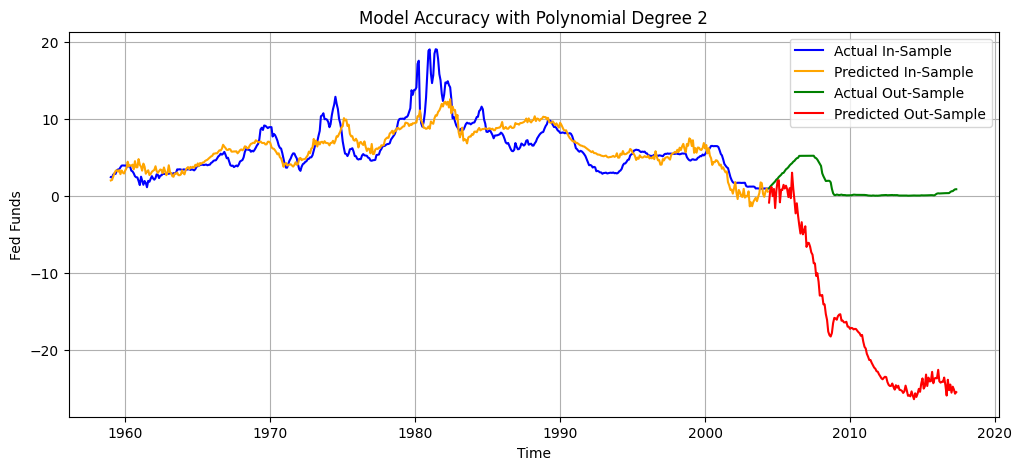

In-sample MSE: 3.9638553911029093
Out-of-sample MSE: 381.01945361345975
------------
DEGREE: 3


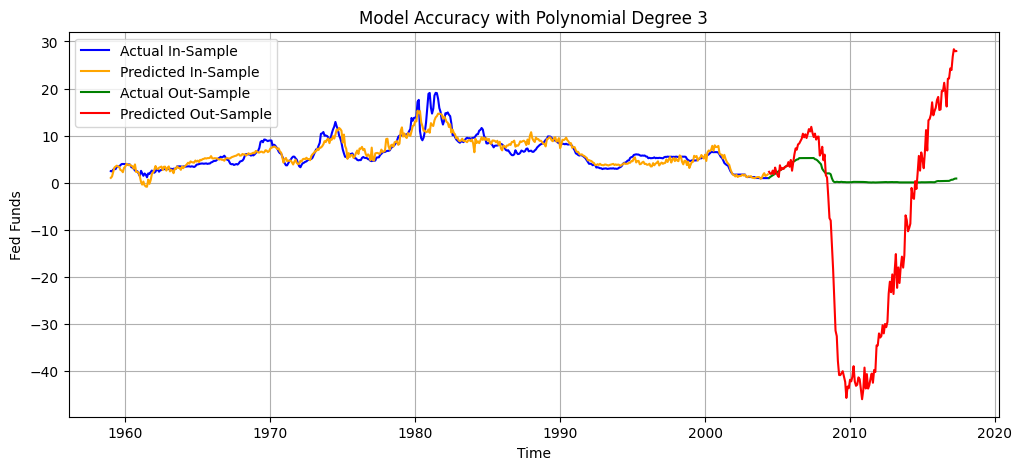

In-sample MSE: 1.8738798996423651
Out-of-sample MSE: 553.3268373542886
------------


In [32]:
# Model fitting
for degree in range(1, degrees+1):
    print('DEGREE:', degree)

    # Polynomial transformation
    poly = PolynomialFeatures(degree=degree)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)

    # Model fitting
    model1 = sm.OLS(y_in, X_in_poly).fit()

    # Prediction
    pred_in = model1.predict(X_in_poly)
    pred_out = model1.predict(X_out_poly)

    # Converting predictions to DataFrame for plotting
    pred_in = pd.DataFrame(pred_in, index=y_in.index)
    pred_out = pd.DataFrame(pred_out, index=y_out.index)

    # Plotting
    plt.figure(figsize=(12, 5))

    plt.plot(y_in, label='Actual In-Sample', color='blue')
    plt.plot(pred_in, label='Predicted In-Sample', color='orange')

    plt.plot(y_out, label='Actual Out-Sample', color='green')
    plt.plot(pred_out, label='Predicted Out-Sample', color='red')

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title(f"Model Accuracy with Polynomial Degree {degree}")
    plt.legend()
    plt.grid()
    plt.show()

    # MSE calculation
    in_mse_1 = mean_squared_error(pred_in, y_in)
    out_mse_1 = mean_squared_error(pred_out, y_out)

    print("In-sample MSE:", in_mse_1)
    print("Out-of-sample MSE:", out_mse_1)
    print('------------')

# 7.) State your observations :

1. **Polynomial Degree 1:**
   - The model with a polynomial degree of 1 (a linear model) shows a reasonable fit to the data, as seen by the trends in the actual vs. predicted lines.
   - The in-sample MSE is relatively low, suggesting a good fit on the training data.
   - However, the out-of-sample MSE is significantly higher, which indicates the model may not be generalizing well to unseen data, pointing to a potential overfit to the training data or a model that's too simple to capture the complexity of the data.

2. **Polynomial Degree 2:**
   - The quadratic model (degree 2) begins to show signs of overfitting, with an even lower in-sample MSE, but a drastically higher out-of-sample MSE.
   - The predicted values for the out-sample start to deviate significantly from the actual values, especially towards the end of the time series, leading to a large MSE.

3. **Polynomial Degree 3:**
   - The cubic model (degree 3) exhibits severe overfitting.
   - The in-sample MSE is the lowest among the three models, indicating an excellent fit to the training data.
   - However, the out-of-sample MSE is the highest, which is clear evidence of overfitting. The model is capturing noise in the training data rather than the underlying trend, resulting in poor predictive performance on the test set.
   - The predicted out-sample values show wild swings, which are not aligned with the actual data trends, leading to a very high MSE.
